In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/catsanddogs/Image Classification CNN Keras Dataset/labels_test.csv
/kaggle/input/catsanddogs/Image Classification CNN Keras Dataset/input_test.csv
/kaggle/input/catsanddogs/Image Classification CNN Keras Dataset/input.csv
/kaggle/input/catsanddogs/Image Classification CNN Keras Dataset/labels.csv


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
X_train = np.loadtxt('../input/catsanddogs/Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('../input/catsanddogs/Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('../input/catsanddogs/Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('../input/catsanddogs/Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

In [4]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (2000, 30000)
shape of Y_train:  (2000,)
shape of X_test:  (400, 30000)
shape of Y_test:  (400,)


In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100,100,3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [6]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (2000, 100, 100, 3)
shape of Y_train:  (2000, 1)
shape of X_test:  (400, 100, 100, 3)
shape of Y_test:  (400, 1)


In [7]:
X_train[1:,]

array([[[[131., 128., 135.],
         [160., 157., 164.],
         [198., 192., 204.],
         ...,
         [250., 249., 247.],
         [255., 255., 253.],
         [250., 249., 245.]],

        [[140., 137., 144.],
         [127., 124., 131.],
         [120., 114., 124.],
         ...,
         [251., 253., 252.],
         [254., 255., 253.],
         [254., 255., 251.]],

        [[204., 202., 207.],
         [187., 185., 190.],
         [147., 142., 148.],
         ...,
         [249., 255., 255.],
         [238., 247., 242.],
         [232., 241., 236.]],

        ...,

        [[174., 182., 195.],
         [172., 180., 193.],
         [178., 186., 197.],
         ...,
         [ 87., 114.,  97.],
         [ 75.,  99.,  83.],
         [ 80., 105.,  86.]],

        [[166., 173., 189.],
         [164., 172., 185.],
         [172., 180., 193.],
         ...,
         [ 78., 106.,  84.],
         [ 72.,  97.,  76.],
         [ 77., 102.,  81.]],

        [[173., 180., 196.],
       

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
X_train[1:,]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

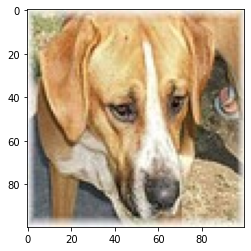

In [10]:
idx = random.randint(2, len(X_train))
plt.imshow(X_train[idx,:])

In [11]:
model= Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
   
])

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [13]:
model.fit(X_train, Y_train, epochs = 20, batch_size=64)

Epoch 1/20
32/32 [==============================] - 6s 157ms/step - loss: 0.7333 - accuracy: 0.4970
Epoch 2/20
32/32 [==============================] - 5s 151ms/step - loss: 0.6760 - accuracy: 0.6020
Epoch 3/20
32/32 [==============================] - 5s 150ms/step - loss: 0.6371 - accuracy: 0.6510
Epoch 4/20
32/32 [==============================] - 6s 180ms/step - loss: 0.5759 - accuracy: 0.7105
Epoch 5/20
32/32 [==============================] - 5s 154ms/step - loss: 0.4901 - accuracy: 0.7650
Epoch 6/20
32/32 [==============================] - 5s 152ms/step - loss: 0.4246 - accuracy: 0.8065
Epoch 7/20
32/32 [==============================] - 5s 149ms/step - loss: 0.3530 - accuracy: 0.8425
Epoch 8/20
32/32 [==============================] - 5s 150ms/step - loss: 0.2624 - accuracy: 0.8940
Epoch 9/20
32/32 [==============================] - 5s 150ms/step - loss: 0.1942 - accuracy: 0.9340
Epoch 10/20
32/32 [==============================] - 6s 173ms/step - loss: 0.1443 - accuracy: 0.9495

In [14]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 26ms/step - loss: 1.7787 - accuracy: 0.6900


[1.7786675691604614, 0.6899999976158142]

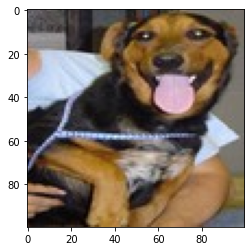

[[0.03258795]]
our model says it is Dog


In [15]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'Dog'
else:
    pred= 'cat'
    
print('our model says it is', pred)